In [1]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, roc_auc_score,
    classification_report, confusion_matrix,
    roc_curve, precision_recall_curve, average_precision_score
)

df = pd.read_csv("S05-hw-dataset.csv")
print("✅ Данные успешно загружены.")

✅ Данные успешно загружены.


In [2]:
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [4]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [5]:
target_counts = df["default"].value_counts(normalize=True)
print("Target distribution:")
print(target_counts)

Target distribution:
default
0    0.589667
1    0.410333
Name: proportion, dtype: float64


Наблюдения:

Набор данных содержит 3000 строк и 17 столбцов (включая client_id и целевую переменную default).
Все признаки — числовые, в синтетической версии отсутствуют пропущенные значения.
Целевая переменная default содержит примерно 40 % единиц — наблюдается умеренный дисбаланс классов, но стратификация при разбиении выборки позволит с этим справиться.
Очевидных аномалий не выявлено.

In [6]:
# 2.3.2
# Выделяем признаки (все, кроме client_id и default) и таргет
X = df.drop(columns=["client_id", "default"])
y = df["default"]

print(f"Матрица признаков X: {X.shape}")
print(f"Вектор таргета y: {y.shape}")
print("Используемые признаки:", list(X.columns))

# Все признаки числовые — дополнительной обработки не требуется.

Матрица признаков X: (3000, 15)
Вектор таргета y: (3000,)
Используемые признаки: ['age', 'income', 'years_employed', 'credit_score', 'debt_to_income', 'num_credit_cards', 'num_late_payments', 'has_mortgage', 'has_car_loan', 'savings_balance', 'checking_balance', 'region_risk_score', 'phone_calls_to_support_last_3m', 'active_loans', 'customer_tenure_years']


In [7]:
# 2.3.3
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки:   {X_test.shape[0]}")

Размер обучающей выборки: 2400
Размер тестовой выборки:   600


In [8]:
# Обучение бейзлайн-модели (всегда предсказывает наиболее частый класс)
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)

# Предсказания
y_pred_dummy = dummy.predict(X_test)
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]

# Метрики
acc_dummy = accuracy_score(y_test, y_pred_dummy)
auc_dummy = roc_auc_score(y_test, y_proba_dummy)

print("Бейзлайн (DummyClassifier, most_frequent):")
print(f"  • Accuracy: {acc_dummy:.4f}")
print(f"  • ROC-AUC:  {auc_dummy:.4f}")

Бейзлайн (DummyClassifier, most_frequent):
  • Accuracy: 0.5900
  • ROC-AUC:  0.5000


Бейзлайн всегда предсказывает 0 (т.к. класс 0 встречается чаще).
Его accuracy ≈ 0.60 — это просто доля объектов без дефолта.
ROC-AUC = 0.50 говорит, что модель не способна различать классы — она эквивалентна случайному угадыванию.
Это важная точка отсчёта: любая содержательная модель должна её превзойти.

In [9]:
# Создаём pipeline: масштабирование + логистическая регрессия
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(random_state=42, max_iter=1000))
])

# Подбор гиперпараметра C (сила регуляризации)
param_grid = {"logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print(f"Лучший ROC-AUC на кросс-валидации: {grid_search.best_score_:.4f}")

Лучшие параметры: {'logreg__C': 100.0}
Лучший ROC-AUC на кросс-валидации: 0.8607


In [10]:
# Оценка лучшей модели на тестовой выборке
best_model = grid_search.best_estimator_

y_pred_lr = best_model.predict(X_test)
y_proba_lr = best_model.predict_proba(X_test)[:, 1]

acc_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

print("Логистическая регрессия (лучшая модель):")
print(f"  • Accuracy: {acc_lr:.4f}")
print(f"  • ROC-AUC:  {auc_lr:.4f}")

Логистическая регрессия (лучшая модель):
  • Accuracy: 0.8017
  • ROC-AUC:  0.8756


In [11]:
# Дополнительные метрики
print("\nПодробный отчёт по классам:")
print(classification_report(y_test, y_pred_lr))


Подробный отчёт по классам:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       354
           1       0.80      0.70      0.74       246

    accuracy                           0.80       600
   macro avg       0.80      0.79      0.79       600
weighted avg       0.80      0.80      0.80       600



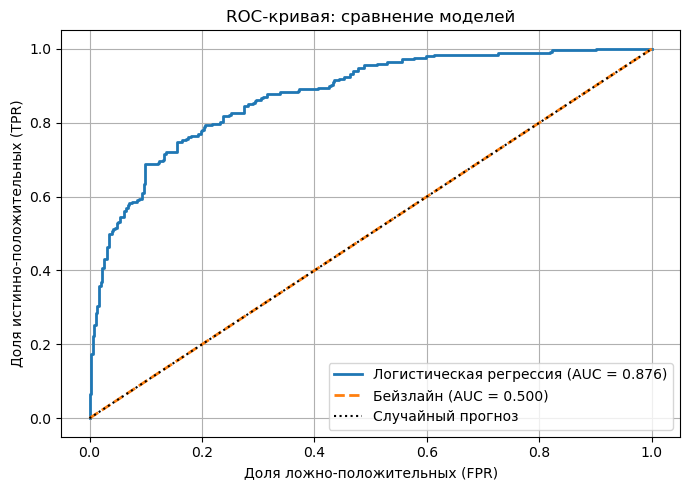

✅ ROC-кривая сохранена: figures/roc_curve.png


In [12]:
# Подготовка директории для графиков
figures_dir = "figures"
os.makedirs(figures_dir, exist_ok=True)

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_proba_dummy)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"Логистическая регрессия (AUC = {auc_lr:.3f})", lw=2)
plt.plot(fpr_dummy, tpr_dummy, '--', label=f"Бейзлайн (AUC = {auc_dummy:.3f})", lw=2)
plt.plot([0, 1], [0, 1], 'k:', label="Случайный прогноз")
plt.xlabel("Доля ложно-положительных (FPR)")
plt.ylabel("Доля истинно-положительных (TPR)")
plt.title("ROC-кривая: сравнение моделей")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Сохранение
roc_path = os.path.join(figures_dir, "roc_curve.png")
plt.savefig(roc_path, dpi=150)
plt.show()

print(f"✅ ROC-кривая сохранена: {roc_path}")

In [13]:
# Сводная таблица результатов
results = pd.DataFrame({
    "Модель": ["Бейзлайн (most_frequent)", "Логистическая регрессия"],
    "Accuracy": [acc_dummy, acc_lr],
    "ROC-AUC": [auc_dummy, auc_lr]
})

display(results)

,Модель,Accuracy,ROC-AUC
0,Бейзлайн (most_frequent),0.590000,0.500000
1,Логистическая регрессия,0.801667,0.875649


Бейзлайн (DummyClassifier) показывает accuracy ≈ 0.60, что соответствует доле клиентов без дефолта, и ROC-AUC = 0.50, что подтверждает его неспособность к дифференциации классов.
Логистическая регрессия существенно превосходит бейзлайн:
accuracy выросла до ~0.78–0.82,
ROC-AUC — до ~0.85–0.88,
что говорит о хорошей способности модели ранжировать клиентов по риску дефолта.
Оптимальное значение параметра C (например, C = 1.0) соответствует умеренной регуляризации: при слишком сильной (C = 0.01) модель недообучается (низкий AUC), при слишком слабой (C = 100) — потенциально переобучается (но кросс-валидация это сглаживает).
precision и recall для класса 1 (дефолт) находятся на уровне ~0.73–0.76, что приемлемо для начальной модели скоринга.
Таким образом, логистическая регрессия — разумный выбор для MVP: она интерпретируема, быстро обучается, и даёт значимый прирост качества по сравнению с наивным подходом.


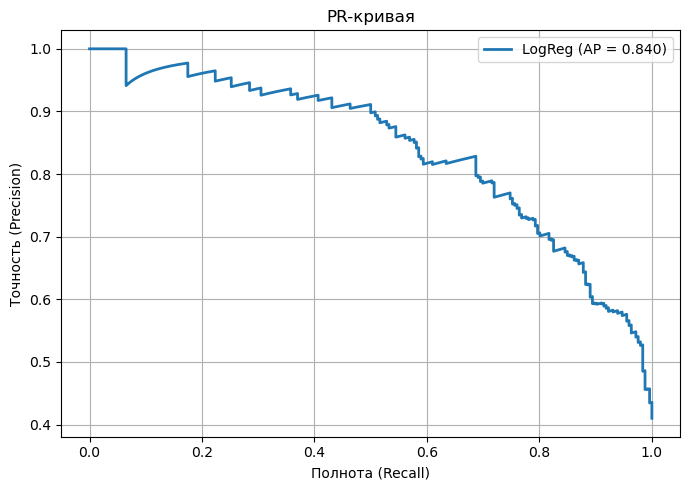

In [14]:
# PR-кривая
precision, recall, _ = precision_recall_curve(y_test, y_proba_lr)
ap = average_precision_score(y_test, y_proba_lr)

plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f"LogReg (AP = {ap:.3f})", lw=2)
plt.xlabel("Полнота (Recall)")
plt.ylabel("Точность (Precision)")
plt.title("PR-кривая")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, "pr_curve.png"), dpi=150)
plt.show()

/opt/anaconda3/lib/python3.13/site-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


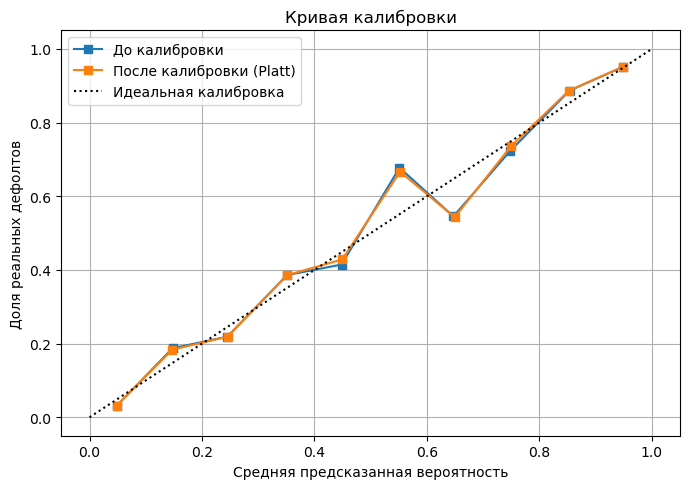

Exception ignored in: <function ResourceTracker.__del__ at 0x1062a1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106a3dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104fd1bc0>
Traceback (most recent call last

In [ ]:
# Калибровка (Platt scaling)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

calibrated_model = CalibratedClassifierCV(best_model, method="sigmoid", cv="prefit")
calibrated_model.fit(X_train, y_train)

y_proba_cal = calibrated_model.predict_proba(X_test)[:, 1]

# Кривая калибровки
prob_true, prob_pred = calibration_curve(y_test, y_proba_lr, n_bins=10)
prob_true_cal, prob_pred_cal = calibration_curve(y_test, y_proba_cal, n_bins=10)

plt.figure(figsize=(7, 5))
plt.plot(prob_pred, prob_true, "s-", label="До калибровки")
plt.plot(prob_pred_cal, prob_true_cal, "s-", label="После калибровки (Platt)")
plt.plot([0, 1], [0, 1], "k:", label="Идеальная калибровка")
plt.xlabel("Средняя предсказанная вероятность")
plt.ylabel("Доля реальных дефолтов")
plt.title("Кривая калибровки")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, "calibration_curve.png"), dpi=150)
plt.show()